In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# wp_data = pd.read_csv(r"C:\Users\kenny\OneDrive - purdue.edu\Documents\Kenny's File\Transportation Literature\Spring 2025\CE 699 Ph.D Thesis\Workplace charging data\dataSet_Oct2021.csv")
wp_data = pd.read_csv(r"C:\Users\wijayak\OneDrive - purdue.edu\Documents\Kenny's File\Transportation Literature\Spring 2025\CE 699 Ph.D Thesis\Workplace charging data\dataSet_Oct2021.csv")

In [4]:
wp_data.head()

,driverId,vehicle_model,request_entry_time,expected_departure,station,start_date_time,end_date_time,start_charge,termin_charge,controlled_duration,miles_requested,max_charge_power,kwh_requested,energy_charged,cost_for_session,afterPaid
0,134,Nissan LEAF,2016-11-03 10:01:03,2016-11-03 16:30:00,10B,NaN,NaN,NaN,NaN,NaN,35,NaN,10.5,NaN,NaN,False
1,134,Nissan LEAF,2016-11-03 10:12:35,2016-11-03 16:30:00,10A,NaN,NaN,NaN,NaN,NaN,35,NaN,10.5,NaN,NaN,False
2,79,Mitsubishi iMiEV,2016-11-03 10:18:11,2016-11-03 16:00:00,03A,NaN,NaN,NaN,NaN,NaN,25,NaN,7.5,NaN,NaN,False
3,299,Chevy Volt,2016-11-03 11:06:13,2016-11-03 13:00:00,15B,NaN,NaN,2016-11-03 10:45:00,2016-11-03 11:00:00,NaN,40,1.538424,14.0,2.994376,0.299438,False
4,2633,Chevy Volt,2016-11-03 11:19:17,2016-11-03 17:00:00,04B,NaN,NaN,NaN,NaN,NaN,50,NaN,17.5,NaN,NaN,False


In [5]:
# Convert request_entry_time to datetime
wp_data['request_entry_time'] = pd.to_datetime(wp_data['request_entry_time'])

# Create derived columns
wp_data['date'] = wp_data['request_entry_time'].dt.date
wp_data['day_of_week'] = wp_data['request_entry_time'].dt.day_name()
wp_data['year'] = wp_data['request_entry_time'].dt.year
wp_data['month'] = wp_data['request_entry_time'].dt.month
wp_data['day'] = wp_data['request_entry_time'].dt.day
wp_data['hour'] = wp_data['request_entry_time'].dt.hour

In [6]:
wp_data.head()

,driverId,vehicle_model,request_entry_time,expected_departure,station,start_date_time,end_date_time,start_charge,termin_charge,controlled_duration,...,kwh_requested,energy_charged,cost_for_session,afterPaid,date,day_of_week,year,month,day,hour
0,134,Nissan LEAF,2016-11-03 10:01:03,2016-11-03 16:30:00,10B,NaN,NaN,NaN,NaN,NaN,...,10.5,NaN,NaN,False,2016-11-03,Thursday,2016,11,3,10
1,134,Nissan LEAF,2016-11-03 10:12:35,2016-11-03 16:30:00,10A,NaN,NaN,NaN,NaN,NaN,...,10.5,NaN,NaN,False,2016-11-03,Thursday,2016,11,3,10
2,79,Mitsubishi iMiEV,2016-11-03 10:18:11,2016-11-03 16:00:00,03A,NaN,NaN,NaN,NaN,NaN,...,7.5,NaN,NaN,False,2016-11-03,Thursday,2016,11,3,10
3,299,Chevy Volt,2016-11-03 11:06:13,2016-11-03 13:00:00,15B,NaN,NaN,2016-11-03 10:45:00,2016-11-03 11:00:00,NaN,...,14.0,2.994376,0.299438,False,2016-11-03,Thursday,2016,11,3,11
4,2633,Chevy Volt,2016-11-03 11:19:17,2016-11-03 17:00:00,04B,NaN,NaN,NaN,NaN,NaN,...,17.5,NaN,NaN,False,2016-11-03,Thursday,2016,11,3,11


In [7]:
wp_data.shape

(40979, 22)

In [8]:
wp_data['energy_charged'].isna().sum()

487

In [9]:
# Filter out rows ever since Covid
wp_data['date'] = pd.to_datetime(wp_data['date'])
wp_nocov_data = wp_data[wp_data['date'] < '2020-03-11']
# Filter out rows weekend
wp_wday_nocov_data = wp_nocov_data[
    (wp_nocov_data['day_of_week'] != 'Saturday') &
    (wp_nocov_data['day_of_week'] != 'Sunday')
]

In [10]:
wp_nocov_data.shape

(36822, 22)

In [11]:
wp_wday_nocov_data.shape

(36366, 22)

In [12]:
days_elapsed = wp_wday_nocov_data['date'].nunique()

In [13]:
# Group by hour and count entries for each hour
hourly_counts = wp_wday_nocov_data.groupby('hour').size().reset_index(name='count')

# Calculate the average number of people per hour
average_per_hour = hourly_counts['count'].mean()

# Display results
print("Hourly counts:")
print(hourly_counts)
print("\nAverage number of people per hour:", average_per_hour)

Hourly counts:
    hour  count
0      4      5
1      5    176
2      6   2124
3      7   8593
4      8  12034
5      9   3574
6     10   1291
7     11   1448
8     12   2631
9     13   2405
10    14   1032
11    15    499
12    16    397
13    17    101
14    18     31
15    19     13
16    20      4
17    21      6
18    23      2

Average number of people per hour: 1914.0


In [14]:
# Reindex to include all hours (0 to 23)
hourly_counts = hourly_counts.set_index('hour').reindex(range(24), fill_value=0).reset_index()

# Convert to dictionary
hourly_counts_dict = hourly_counts.set_index('hour')['count'].to_dict()

In [15]:
hourly_counts

,hour,count
0,0,0
1,1,0
2,2,0
3,3,0
4,4,5
5,5,176
6,6,2124
7,7,8593
8,8,12034
9,9,3574


In [16]:
# Convert the values into a NumPy array
hourly_counts_array = np.array(list(hourly_counts_dict.values()))
avg_counts = np.ceil(np.divide(hourly_counts_array, days_elapsed))

In [17]:
avg_counts

array([ 0.,  0.,  0.,  0.,  1.,  1.,  3., 10., 14.,  5.,  2.,  2.,  4.,
        3.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.])

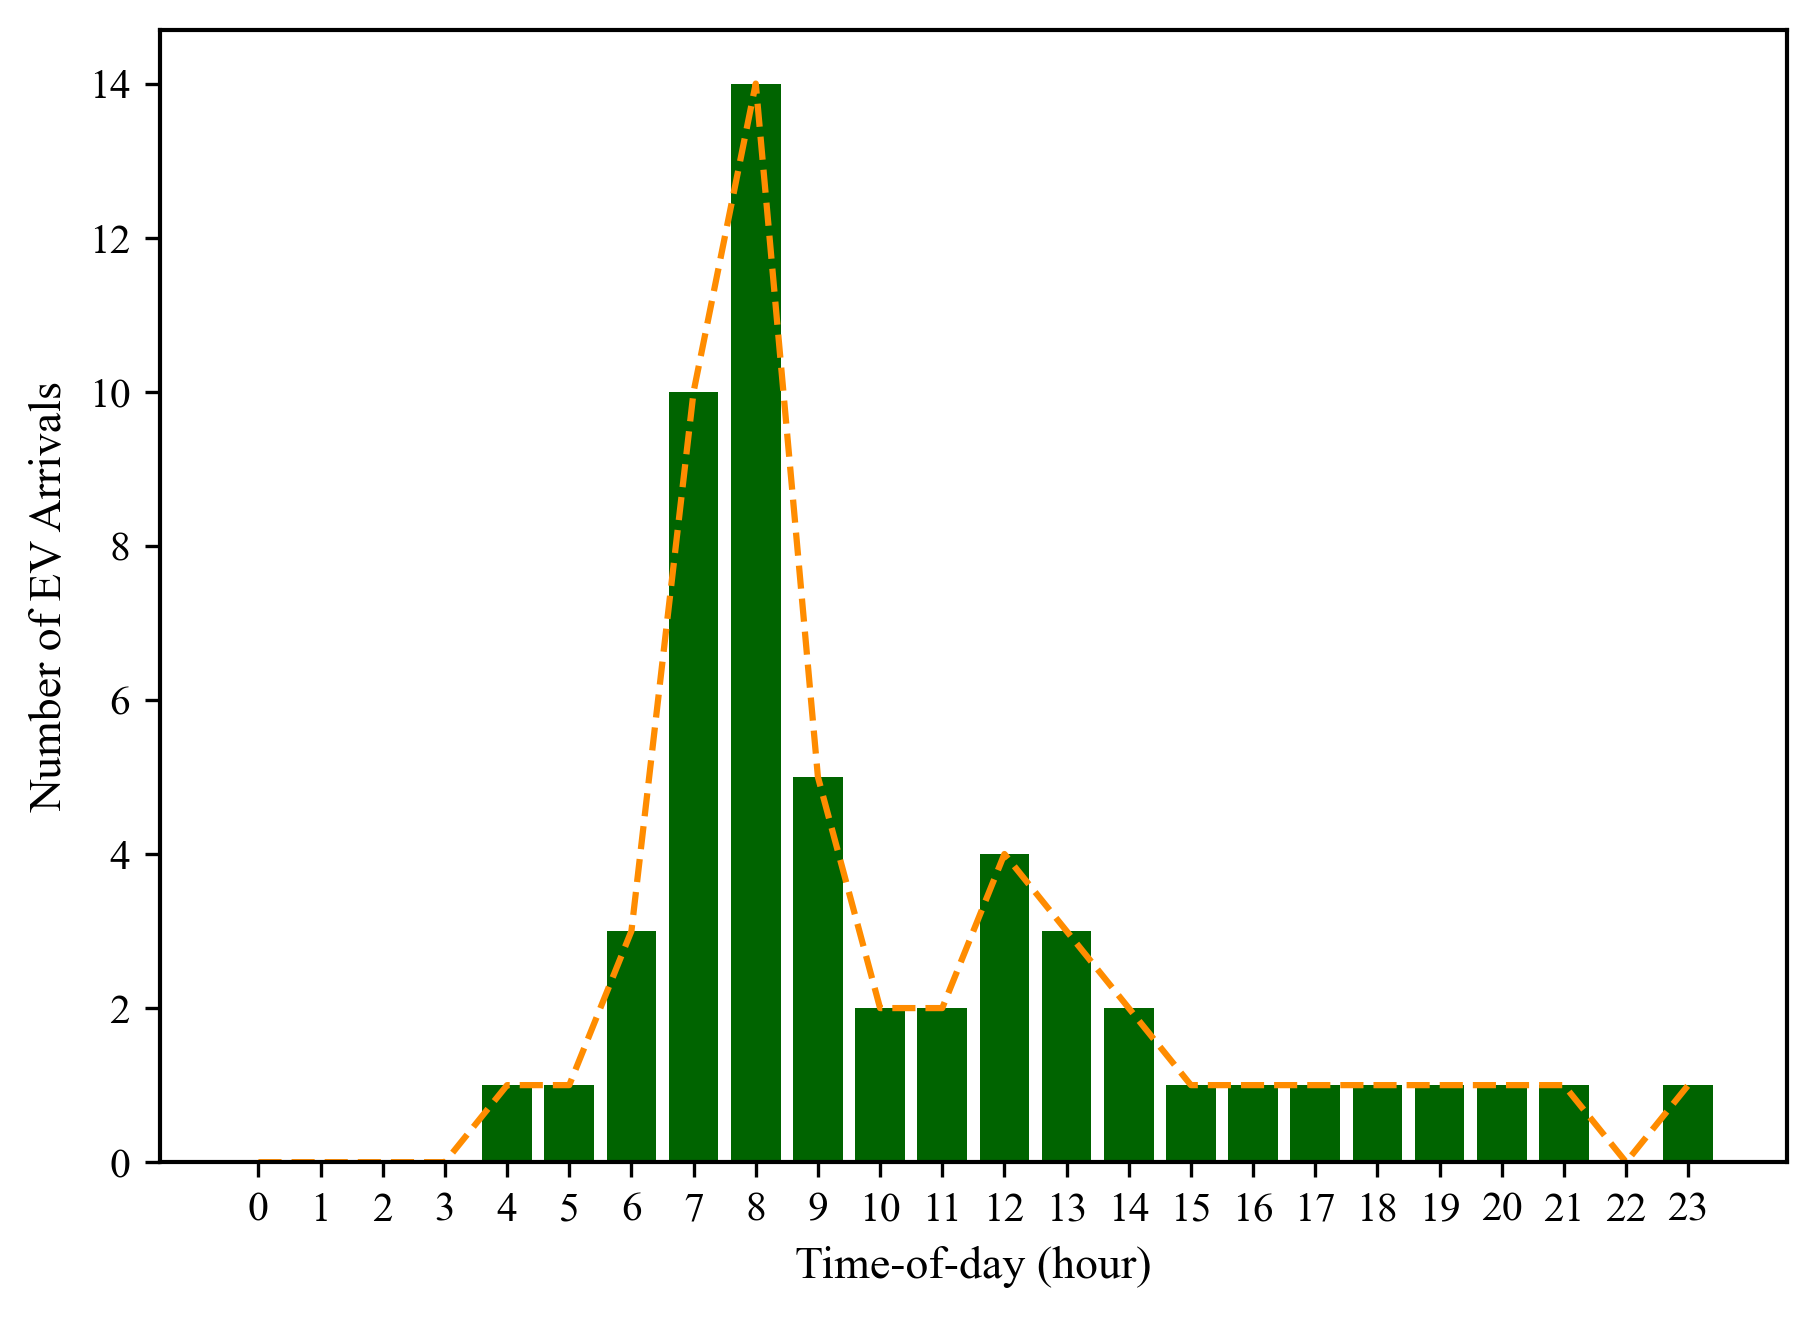

In [25]:
# Set publication-quality parameters
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 9,
    'figure.figsize': (7, 5),
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'axes.linewidth': 1.0,
    'grid.alpha': 0.3,
    'lines.linewidth': 1.5,
    'lines.markersize': 4
})


plt.bar(np.arange(0, 24, 1), avg_counts, color='darkgreen')
plt.plot(avg_counts, color='darkorange', linestyle='--')

plt.xlabel('Time-of-day (hour)')
plt.ylabel('Number of EV Arrivals')

plt.xticks(np.arange(0, 24, 1))

# plt.savefig(r"C:\Users\kenny\OneDrive - purdue.edu\Documents\Kenny's File\Transportation Literature\Fall 2024\CE 597 SET\Project\Workplace charging data\average_arrival.png",
#            dpi = 900)
plt.savefig(r"C:\Users\wijayak\OneDrive - purdue.edu\Documents\Kenny's File\Transportation Literature\Fall 2024\CE 597 SET\Project\Journal Submission\Figures\nrel_average_arrival.png",
           dpi = 700)
plt.show()

In [ ]:
from scipy.stats import gaussian_kde
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d

# Hourly average arrival rates
hourly_rates = avg_counts

# Create minute-based data
minute_data = []
for hour, rate in enumerate(hourly_rates):
    arrivals = int(rate * 60)  # Approximate arrivals for the hour, scaled to minutes
    minute_data.extend(np.random.uniform(low=hour*60, high=(hour+1)*60, size=arrivals))

minute_data = np.array(minute_data)

# Perform Kernel Density Estimation (KDE)
kde = gaussian_kde(minute_data)
x_grid = np.linspace(0, 24*60, 1440)  # 24 hours in minute units
pdf_values = kde(x_grid)

# Compute the Cumulative Distribution Function (CDF)
cdf_values = cumtrapz(pdf_values, x_grid, initial=0)
cdf_values /= cdf_values[-1]  # Normalize to ensure the CDF ends at 1

# Interpolate the inverse CDF
inverse_cdf = interp1d(cdf_values, x_grid, bounds_error=False, fill_value=(x_grid[0], x_grid[-1]))

# Simulate arrival times as a random process
num_samples = 1000  # Number of arrivals to simulate
random_probabilities = np.random.uniform(0, 1, num_samples)
arrival_times = inverse_cdf(random_probabilities)

# Align arrival times with discrete time steps
time_step = 1  # Simulation time step in minutes
discrete_arrival_counts = np.zeros(int(24*60/time_step))  # 24 hours in minute steps

for t in arrival_times:
    index = int(t // time_step)
    discrete_arrival_counts[index] += 1

# Plot the arrival process
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(discrete_arrival_counts)) * time_step, discrete_arrival_counts, label="Discrete Arrival Counts")
plt.xlabel("Time (minutes)")
plt.ylabel("Number of Arrivals")
plt.title("Simulated Arrival Process")
plt.legend()
plt.grid(True)
plt.show()

## Unsupervised ML

In [31]:
from sklearn import mixture
from sklearn.preprocessing import OneHotEncoder

In [17]:
wp_nocov_data.columns

Index(['driverId', 'vehicle_model', 'request_entry_time', 'expected_departure',
       'station', 'start_date_time', 'end_date_time', 'start_charge',
       'termin_charge', 'controlled_duration', 'miles_requested',
       'max_charge_power', 'kwh_requested', 'energy_charged',
       'cost_for_session', 'afterPaid', 'date', 'day_of_week', 'year', 'month',
       'day', 'hour'],
      dtype='object')

In [33]:
col_drops = ['request_entry_time', 'expected_departure', 'station', 'start_date_time', 'end_date_time', 'start_charge'
             , 'termin_charge', 'controlled_duration', 'date', 'driverId']
X_gmm = wp_nocov_data.drop(col_drops, axis=1)
X_gmm['kwh_diff'] = X_gmm['kwh_requested'] - X_gmm['energy_charged']
X_gmm = X_gmm.dropna()
# One-hot encode categorical variables
X_gmm = pd.get_dummies(X_gmm, columns=['vehicle_model', 'day_of_week'], drop_first=True)

In [29]:
X_gmm.head()

,vehicle_model,miles_requested,max_charge_power,kwh_requested,energy_charged,cost_for_session,afterPaid,day_of_week,year,month,day,hour,kwh_diff
3,Chevy Volt,40,1.538424,14.00,2.994376,0.299438,False,Thursday,2016,11,3,11,11.005624
5,Chevy Volt,5,1.582000,1.75,7.877445,1.037745,False,Friday,2016,11,4,6,-6.127445
6,Nissan LEAF,90,3.031380,27.00,8.832178,0.883218,False,Friday,2016,11,4,7,18.167822
7,Nissan LEAF,20,1.771489,6.00,8.376392,0.837639,False,Friday,2016,11,4,7,-2.376392
8,Chevy Spark,15,2.954318,4.20,4.367074,0.686707,False,Friday,2016,11,4,7,-0.167074


In [23]:
X_gmm.shape

(28868, 14)

In [32]:
X_gmm.dtypes

vehicle_model        object
miles_requested       int64
max_charge_power    float64
kwh_requested       float64
energy_charged      float64
cost_for_session    float64
afterPaid              bool
day_of_week          object
year                  int64
month                 int64
day                   int64
hour                  int64
kwh_diff            float64
dtype: object

In [34]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full', random_state = 13).fit(X_gmm)
labels = gmm.predict(X_gmm)

In [35]:
labels

array([2, 2, 1, ..., 0, 0, 2], dtype=int64)